In [1]:
from google.cloud import bigquery
import pandas as pd
import os
import time
import numpy as np
import datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 150
import seaborn as sns

pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
pd.options.display.min_rows = 20

## Figure 1

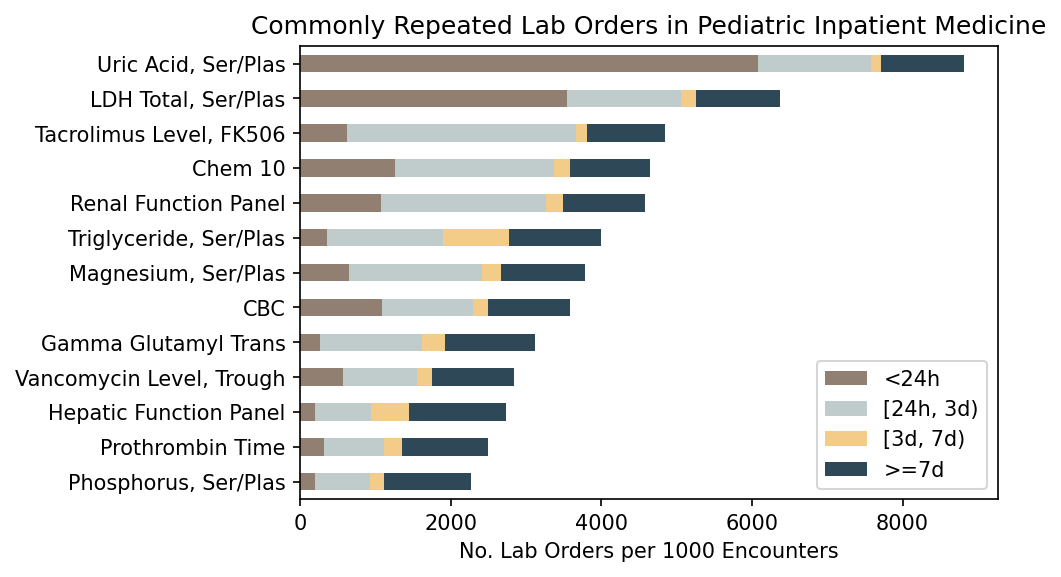

In [2]:
labdtq = pd.read_csv('data/labdtq.csv', index_col=0)

# original
# ax1 = labdtq.iloc[3].plot.barh(color='#404c54');
# labdtq.iloc[2].plot.barh(ax=ax1, color='#f0cc94');
# labdtq.iloc[1].plot.barh(ax=ax1, color='#c0cccc');
# labdtq.iloc[0].plot.barh(ax=ax1, color='#807A6B');

# blue gradient
ax1 = labdtq.iloc[3].plot.barh(color='#2F4858');
labdtq.iloc[2].plot.barh(ax=ax1, color='#F2CC88');
labdtq.iloc[1].plot.barh(ax=ax1, color='#c0cccc');
labdtq.iloc[0].plot.barh(ax=ax1, color='#918071');

ax1.legend();
ax1.invert_yaxis();
ax1.set_title('Commonly Repeated Lab Orders in Pediatric Inpatient Medicine');
ax1.set_xlabel('No. Lab Orders per 1000 Encounters');

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(reversed(handles), reversed(labels));

## Figure 2

In [3]:
def plotLabStab(df, ndays, ax = None, subset=False, labs=['']):
    df = df[0:ndays+1]
    if subset:
        df = df[labs]
    sns.set_style("white");
    if ax is None:
        ax = sns.lineplot(data = df, markers=True);
    else:
        sns.lineplot(data = df, markers=True, ax = ax);
    ax.set_xlabel('Consecutive Normal Results in Past 7 Days Preceding Lab');
    ax.set_xlim(-0.25, ndays+0.25)
    ax.set_xticks(np.arange(ndays+1))
    ax.set_ylabel('Proportion Normal Results');
    ax.set_title('Stability for Common Inpatient Laboratory Studies');
    ax.set_ylim(0, 1.0);
    return ax

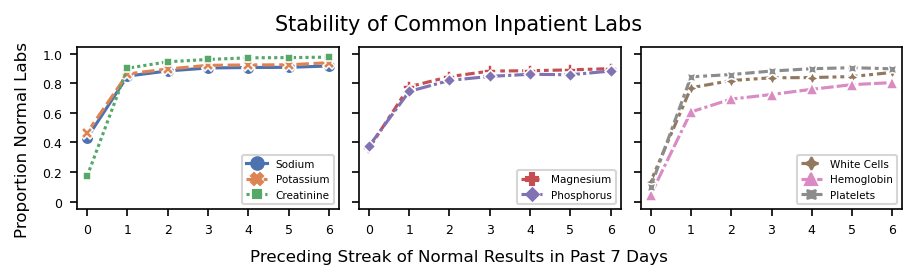

In [5]:
labstab = pd.read_csv('data/labstab.csv', index_col=0)
labstabcnts = pd.read_csv('data/labstabcnts.csv', index_col=0)
STREAK = 6

cmap = sns.color_palette('deep')
dash_list = sns._core.unique_dashes(8);
marker_list = sns._core.unique_markers(8)

chem1 = ['Sodium', 'Potassium', 'Creatinine']
chem2 = ['Magnesium', 'Phosphorus']
cbc = ['White Cells', 'Hemoglobin', 'Platelets']

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(6, 1.75), constrained_layout=True)

sns.lineplot(data=labstab[chem1][1:STREAK+2], ax=axes[0],
             palette = cmap[0:3], dashes=dash_list[0:3], markers=marker_list[0:3])
sns.lineplot(data=labstab[chem2][1:STREAK+2], ax=axes[1], 
             palette = cmap[3:5], dashes=dash_list[3:5], markers=marker_list[3:5])
sns.lineplot(data=labstab[cbc][1:STREAK+2], ax=axes[2], 
             palette = cmap[5:8], dashes=dash_list[5:8], markers=marker_list[5:8])

for ax in axes:
    ax.set_xlim(-0.25, STREAK+0.25);
    ax.set_ylim(-0.05, 1.05);
    ax.set_xticks(np.arange(STREAK+1));
    ax.set_xticklabels(labels=np.arange(STREAK+1), fontsize=6);
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(labels=[0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=6);
    ax.set_ylabel('');
    ax.set_xlabel('');
    ax.set_title('');
    ax.legend(fontsize=5, loc=4);
    
#axes[0].set_title('Chem Panel', fontsize=7);
#axes[1].set_title('Additional Chemistries', fontsize=7);
#axes[2].set_title('Blood Count', fontsize=7);

fig.supylabel('Proportion Normal Labs', fontsize=8);
fig.supxlabel('Preceding Streak of Normal Results in Past 7 Days', fontsize=8);
fig.suptitle('Stability of Common Inpatient Labs', fontsize=10);

## Alternate Figure 2

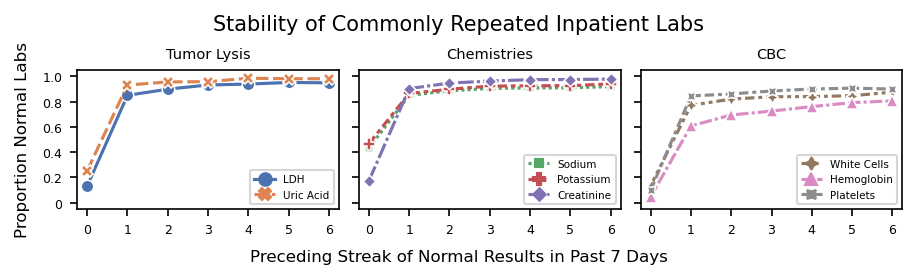

In [56]:
labstab = pd.read_csv('data/labstab.csv', index_col=0)
labstabcnts = pd.read_csv('data/labstabcnts.csv', index_col=0)
STREAK = 6

cmap = sns.color_palette('deep')
dash_list = sns._core.unique_dashes(8);
marker_list = sns._core.unique_markers(8)

tlysis = ['LDH', 'Uric Acid']
chem1 = ['Sodium', 'Potassium', 'Creatinine']
cbc = ['White Cells', 'Hemoglobin', 'Platelets']

fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(6, 1.75), constrained_layout=True)

sns.lineplot(data=labstab[tlysis][1:STREAK+2], ax=axes[0],
             palette = cmap[0:2], dashes=dash_list[0:2], markers=marker_list[0:2])
sns.lineplot(data=labstab[chem1][1:STREAK+2], ax=axes[1], 
             palette = cmap[2:5], dashes=dash_list[2:5], markers=marker_list[2:5])
sns.lineplot(data=labstab[cbc][1:STREAK+2], ax=axes[2], 
             palette = cmap[5:8], dashes=dash_list[5:8], markers=marker_list[5:8])

for ax in axes:
    ax.set_xlim(-0.25, STREAK+0.25);
    ax.set_ylim(-0.05, 1.05);
    ax.set_xticks(np.arange(STREAK+1));
    ax.set_xticklabels(labels=np.arange(STREAK+1), fontsize=6);
    ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_yticklabels(labels=[0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=6);
    ax.set_ylabel('');
    ax.set_xlabel('');
    ax.set_title('');
    ax.legend(fontsize=5, loc=4);
    
axes[0].set_title('Tumor Lysis', fontsize=7);
axes[1].set_title('Chemistries', fontsize=7);
axes[2].set_title('CBC', fontsize=7);

fig.supylabel('Proportion Normal Labs', fontsize=8);
fig.supxlabel('Preceding Streak of Normal Results in Past 7 Days', fontsize=8);
fig.suptitle('Stability of Commonly Repeated Inpatient Labs', fontsize=10);